In [1]:
# Simulating the semantic web using a dictionary (graph-like structure)
data_graph = {
    'Apple (company)': {
        'founded_by': 'Steve Jobs',
        'produces': 'iPhone'
    },
    'Steve Jobs': {
        'founded': 'Apple (company)'
    },
    'Apple (fruit)': {
        'is_a': 'Fruit',
        'grows_on': 'Tree'
    }
}

# Function to display current data graph
def display_graph():
    for entity, relationships in data_graph.items():
        print(f"Entity: {entity}")
        for relation, target in relationships.items():
            print(f"  {relation}: {target}")
        print("\n")

# Display initial graph
display_graph()


Entity: Apple (company)
  founded_by: Steve Jobs
  produces: iPhone


Entity: Steve Jobs
  founded: Apple (company)


Entity: Apple (fruit)
  is_a: Fruit
  grows_on: Tree




In [2]:
# Function to add a new entity and relationship
def add_relationship(entity, relationship, target):
    if entity not in data_graph:
        data_graph[entity] = {}
    data_graph[entity][relationship] = target
    print(f"Added: {entity} --({relationship})--> {target}")

# Example of adding a new entity and relationship
add_relationship("Tesla", "founded_by", "Elon Musk")
add_relationship("Elon Musk", "founded", "Tesla")

# Display updated graph
display_graph()


Added: Tesla --(founded_by)--> Elon Musk
Added: Elon Musk --(founded)--> Tesla
Entity: Apple (company)
  founded_by: Steve Jobs
  produces: iPhone


Entity: Steve Jobs
  founded: Apple (company)


Entity: Apple (fruit)
  is_a: Fruit
  grows_on: Tree


Entity: Tesla
  founded_by: Elon Musk


Entity: Elon Musk
  founded: Tesla




In [3]:
# Function to query an entity and its relationships
def query_entity(entity):
    if entity in data_graph:
        print(f"Entity: {entity}")
        for relation, target in data_graph[entity].items():
            print(f"  {relation}: {target}")
    else:
        print(f"Entity '{entity}' not found in the graph.")

# Query example: Try querying an existing entity
query_entity("Apple (company)")

# Query example: Try querying a newly added entity
query_entity("Tesla")


Entity: Apple (company)
  founded_by: Steve Jobs
  produces: iPhone
Entity: Tesla
  founded_by: Elon Musk


In [4]:
!pip install networkx matplotlib


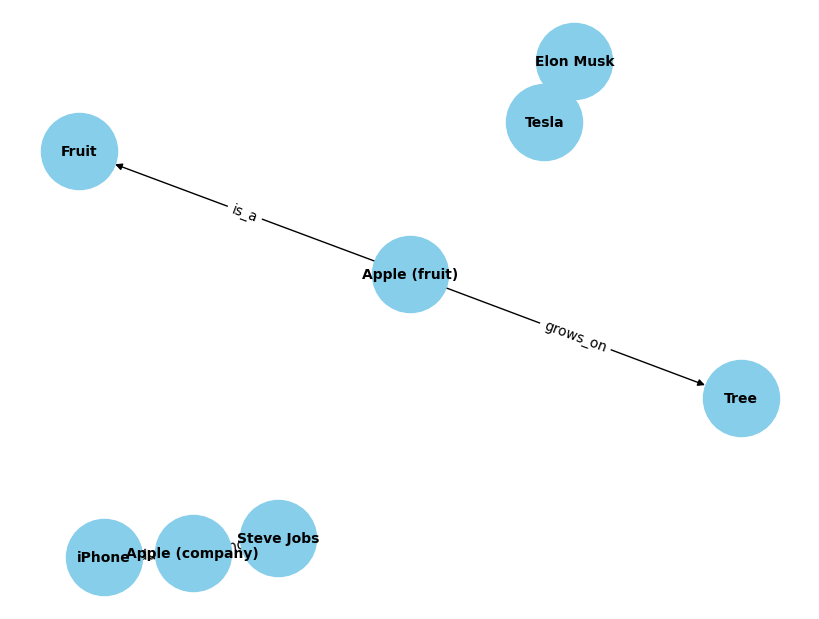

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to visualize the graph
def visualize_graph():
    G = nx.DiGraph()  # Directed graph

    # Adding nodes and edges
    for entity, relationships in data_graph.items():
        for relation, target in relationships.items():
            G.add_edge(entity, target, label=relation)

    # Draw the graph
    pos = nx.spring_layout(G)  # Positioning nodes
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, font_weight='bold', arrows=True)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

# Visualize the current graph
visualize_graph()
